# Linear regression on a diabetes dataset 

This example is based on the **sklearn** Python library. 

Today we look at the **diabetes dataset**, which consists of the following features. 
- age, age in years
- sex
- bmi, body mass index
- bp, average blood pressure
- s1 tc, T-Cells (a type of white blood cells)
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, thyroid stimulating hormone
- s5 ltg, lamotrigine
- s6 glu, blood sugar level

Features have been mean centered and scaled. The outcom variable $y$ is a measure of disease progression. 



In [ ]:

# Code source: Jaques Grobler
# License: BSD 3 clause
# 
# Modified code from sklearn sample (see above)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

print(diabetes_X.shape)
print(diabetes_y[:2])
print(diabetes_X[0,])



(442, 10)
[151.  75.]
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]


We take only the feature BMI for this experiment.  

In [ ]:
# Use only BMI: body mass index as feature 
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# outcome: a measure of disease progression
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

print(len(diabetes_y_train), len(diabetes_y_test))

422 20


### Visualize training data 

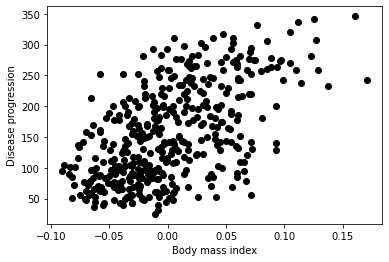

In [ ]:
plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.xlabel('Body mass index')
plt.ylabel('Disease progression')
plt.show()

### Fits a linear regression model 

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction for test data 

We predict outcome values $y$ for the test set points 


In [ ]:
diabetes_y_pred = regr.predict(diabetes_X_test)
print('Coefficient: ', regr.coef_[0], ' Intercept: ', regr.intercept_)



Coefficient:  938.2378612512637  Intercept:  152.91886182616167


Visualize the predicted values 

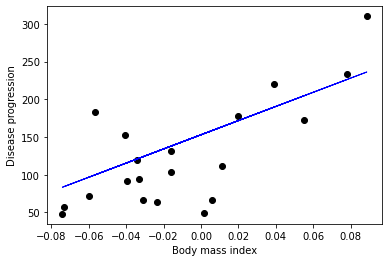

Mean squared error:  2548.0723987259694


In [ ]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=1)
plt.xlabel('Body mass index')
plt.ylabel('Disease progression')
plt.show()

print('Mean squared error: ', mean_squared_error(diabetes_y_test, diabetes_y_pred))


# import seaborn as sns 
# sns.regplot(x=diabetes_X_test, y=diabetes_y_pred)
